## Project 4

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.


In [1]:
#question 1
#Scrape and prepare your own data (Refer to Project4_Webscraping_alicia file)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
jobs=pd.read_csv(".\jobs_data.csv")

In [4]:
jobs.head()

,Unnamed: 0,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements
0,0,MONEYSMART SINGAPORE PTE. LTD.,Data Engineer,"GRANDE BUILDING, 8 COMMONWEALTH LANE 149555",Full Time,Executive,Information Technology,"$5,000to$7,000",Monthly,RequirementsCompetencies Degree in Computer S...
1,1,PORTCAST PTE. LTD.,Data Scientist,32 CARPENTER STREET 059911,Full Time,Middle Management,Engineering,"$2,200to$6,000",Monthly,Requirements● Comfortable working with large ...
2,2,SINGAPORE PRESS HOLDINGS LIMITED,Data Visualisation Designer,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",Permanent,Junior Executive,Design,"$3,500to$4,500",Monthly,Requirements Prior experience in a data visual...
3,3,GRABTAXI HOLDINGS PTE. LTD.,Data Analyst,"OUE DOWNTOWN, 6 SHENTON WAY 068809",Full Time,Executive,Information Technology,0,NaN,RequirementsThe must haves: A Bachelor's/Mast...
4,4,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Data Center Engineering Project Engineer APAC,"AIA TOWER, 1 ROBINSON ROAD 048542",Full Time,Professional,"Design, Engineering","$9,000to$12,000",Monthly,RequirementsBasic Qualifications - Minimum 5 ...


In [5]:
#check the data
jobs.shape

(3975, 10)

In [6]:
jobs.columns

Index(['Unnamed: 0', 'company', 'job_title', 'address', 'employment_type',
       'seniority', 'category', 'salary', 'salary_period', 'requirements'],
      dtype='object')

In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 10 columns):
Unnamed: 0         3975 non-null int64
company            3975 non-null object
job_title          3975 non-null object
address            3975 non-null object
employment_type    3975 non-null object
seniority          3975 non-null object
category           3975 non-null object
salary             3975 non-null object
salary_period      3525 non-null object
requirements       3975 non-null object
dtypes: int64(1), object(9)
memory usage: 310.6+ KB


In [8]:
jobs.head()

,Unnamed: 0,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements
0,0,MONEYSMART SINGAPORE PTE. LTD.,Data Engineer,"GRANDE BUILDING, 8 COMMONWEALTH LANE 149555",Full Time,Executive,Information Technology,"$5,000to$7,000",Monthly,RequirementsCompetencies Degree in Computer S...
1,1,PORTCAST PTE. LTD.,Data Scientist,32 CARPENTER STREET 059911,Full Time,Middle Management,Engineering,"$2,200to$6,000",Monthly,Requirements● Comfortable working with large ...
2,2,SINGAPORE PRESS HOLDINGS LIMITED,Data Visualisation Designer,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",Permanent,Junior Executive,Design,"$3,500to$4,500",Monthly,Requirements Prior experience in a data visual...
3,3,GRABTAXI HOLDINGS PTE. LTD.,Data Analyst,"OUE DOWNTOWN, 6 SHENTON WAY 068809",Full Time,Executive,Information Technology,0,NaN,RequirementsThe must haves: A Bachelor's/Mast...
4,4,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Data Center Engineering Project Engineer APAC,"AIA TOWER, 1 ROBINSON ROAD 048542",Full Time,Professional,"Design, Engineering","$9,000to$12,000",Monthly,RequirementsBasic Qualifications - Minimum 5 ...


In [9]:
#---steps taken to clean data-----
#drop Unnamed: 0 columns
#address column, spilt out postal code and first 2 digit of postal code. 
#job title column, change to lower case and filter those data related jobs only
#salary, remove rows without salary as our target is salary
#salary, spilt min salary and max salary
#salary, transformed those values which are not monthly
#salary, calculate the average salary by taking the average of min/max salary
#salary, remove those outliers with super high salary
#seniority column, remove those words after ','
#employment_type column, remove those words after ','

In [10]:
#drop Unnamed: 0 columns
jobs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 9 columns):
company            3975 non-null object
job_title          3975 non-null object
address            3975 non-null object
employment_type    3975 non-null object
seniority          3975 non-null object
category           3975 non-null object
salary             3975 non-null object
salary_period      3525 non-null object
requirements       3975 non-null object
dtypes: object(9)
memory usage: 279.6+ KB


In [12]:
#address column, spilt out postal code and first 2 digit of postal code(postal district)
jobs['postal_code']=jobs['address'].apply(lambda x: x[-6:])
jobs['postal_district']=jobs['postal_code'].apply(lambda x: x[:2])

In [13]:
jobs['postal_district'].unique()

array(['14', '05', '31', '06', '04', '11', '52', '22', '48', '0', '18',
       '33', '08', '36', '07', '66', '01', '62', '63', '03', '34', '15',
       '19', '40', '21', '50', '17', '13', '09', '30', '57', '81', '78',
       '20', '61', '41', '24', '75', '53', '60', '39', '76', '10', '23',
       '73', '64', '43', '65', '16', '56', '59', '32', '12', '72', '55',
       '44', '29', '54', '38', '49', '69', '46', '79', '58', '82', '51',
       '80', '35', '25', '67', 'ay', '28'], dtype=object)

In [14]:
#check the row with postal_district == ay? weird..
jobs[jobs['postal_district']=='ay']

,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements,postal_code,postal_district
3355,POLE TO WIN SINGAPORE PTE. LTD.,B-B Sales Support Executive / Gaming Tech / ...,"Unit No 2-1, Level 2, Tower 3 Avenue 3, Bangs...","Permanent, Full Time",Junior Executive,Sales / Retail,"$2,500to$3,000",Monthly,Requirements Minimum diploma holder Minimum 2 ...,aysia,ay


In [15]:
jobs.loc[3355,'postal_district']= '0'

In [16]:
jobs.columns

Index(['company', 'job_title', 'address', 'employment_type', 'seniority',
       'category', 'salary', 'salary_period', 'requirements', 'postal_code',
       'postal_district'],
      dtype='object')

In [17]:
jobs['job_title'] = jobs['job_title'].str.lower()
jobs['seniority'] = jobs['seniority'].str.lower()

In [18]:
jobs['job_title'].value_counts(ascending=False).head(20)

data scientist               47
accounts executive           42
data engineer                26
business analyst             25
software engineer            23
accounts assistant           22
accountant                   22
research fellow              21
data analyst                 18
project manager              17
senior software engineer     17
admin assistant              17
research assistant           16
software developer           16
software consultant          15
administrative assistant     14
finance manager              13
senior software developer    12
manager                      12
research associate           12
Name: job_title, dtype: int64

In [19]:
#job title column, remove those words in brackets. 
jobs['job_title'].nunique()

2882

In [20]:
# data related jobs: like data scientist, data analyst, research scientist, business intelligence
data_jobs = jobs[jobs.job_title.str.contains('data | technology | engineer | analyst | scientist | business | intelligence | research | software | account | consultant | developer')]

In [21]:
data_jobs.shape

(1039, 11)

In [22]:
data_jobs.replace('0', np.NaN, inplace=True)

C:\Users\ALICIA\Anaconda3\lib\site-packages\pandas\core\frame.py:4032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [23]:
data_jobs.shape

(1039, 11)

In [24]:
#check the null columns
data_jobs.isnull().sum()

company              0
job_title            0
address            261
employment_type      0
seniority           14
category             0
salary              91
salary_period       91
requirements        29
postal_code        261
postal_district    261
dtype: int64

In [25]:
#salary, remove rows without salary as our target is salary
data_jobs.dropna(subset=['salary'], inplace=True)

C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
data_jobs.shape

(948, 11)

In [27]:
data_jobs['salary'].head()

0     $5,000to$7,000
1     $2,200to$6,000
2     $3,500to$4,500
4    $9,000to$12,000
5    $5,000to$10,000
Name: salary, dtype: object

In [28]:
# #salary, spilt min salary and max salary
salary_spilt = data_jobs["salary"].str.split("to",n=1, expand=True) 

In [29]:
salary_spilt.head()

,0,1
0,"$5,000","$7,000"
1,"$2,200","$6,000"
2,"$3,500","$4,500"
4,"$9,000","$12,000"
5,"$5,000","$10,000"


In [30]:
data_jobs['min_salary']=salary_spilt[0]
data_jobs['max_salary']=salary_spilt[1]

C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#salary, remove '$' and convert to int for min salary and max salary
data_jobs['min_salary'] = data_jobs['min_salary'].apply(lambda x: x.replace('$',''))
data_jobs['min_salary'] = data_jobs['min_salary'].apply(lambda x: int(x.replace(',','')))
data_jobs['max_salary'] = data_jobs['max_salary'].apply(lambda x: x.replace('$',''))
data_jobs['max_salary'] = data_jobs['max_salary'].apply(lambda x: int(x.replace(',','')))

C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [32]:
data_jobs.head()

,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements,postal_code,postal_district,min_salary,max_salary
0,MONEYSMART SINGAPORE PTE. LTD.,data engineer,"GRANDE BUILDING, 8 COMMONWEALTH LANE 149555",Full Time,executive,Information Technology,"$5,000to$7,000",Monthly,RequirementsCompetencies Degree in Computer S...,149555,14,5000,7000
1,PORTCAST PTE. LTD.,data scientist,32 CARPENTER STREET 059911,Full Time,middle management,Engineering,"$2,200to$6,000",Monthly,Requirements● Comfortable working with large ...,059911,05,2200,6000
2,SINGAPORE PRESS HOLDINGS LIMITED,data visualisation designer,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",Permanent,junior executive,Design,"$3,500to$4,500",Monthly,Requirements Prior experience in a data visual...,318994,31,3500,4500
4,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,data center engineering project engineer apac,"AIA TOWER, 1 ROBINSON ROAD 048542",Full Time,professional,"Design, Engineering","$9,000to$12,000",Monthly,RequirementsBasic Qualifications - Minimum 5 ...,048542,04,9000,12000
5,JOHNSON & JOHNSON PTE. LTD.,lead data center engineer,"ASCENT, 2 SCIENCE PARK DRIVE 118222",Permanent,professional,"Engineering, Information Technology","$5,000to$10,000",Monthly,RequirementsRequired Minimum Education: Bache...,118222,11,5000,10000


In [33]:
data_jobs['salary_period'].unique()

array(['Monthly', 'Annually'], dtype=object)

In [34]:
data_jobs.loc[jobs['salary_period'] == 'Annually']

,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements,postal_code,postal_district,min_salary,max_salary
366,Company Undisclosed,enterprise software sales consultant,NaN,Full Time,executive,Information Technology,"$50,000to$100,000",Annually,RequirementsRequirements and qualifications P...,NaN,NaN,50000,100000
388,UBS AG,data center service manager,1 RAFFLES QUAY 048583,Full Time,senior executive,Banking and Finance,"$160,000to$240,000",Annually,Requirements- At least 5 years' experience in ...,048583,04,160000,240000
398,SPOTIFY SINGAPORE PTE. LTD.,data scientist,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Permanent,executive,Others,"$90,000to$110,000",Annually,RequirementsWho you are Degree in Computer Sc...,018981,01,90000,110000
407,"TURNER BROADCASTING SALES SOUTHEAST ASIA, INC","engineer, business intelligence","NEXUS @ONE-NORTH, 1 FUSIONOPOLIS LINK 138542",Permanent,executive,Information Technology,"$68,040to$83,160",Annually,RequirementsEssential 1. 4+ years solid experi...,138542,13,68040,83160
456,SABRE ASIA PACIFIC PTE. LTD.,hr business partner,"ABACUS PLAZA, 3 TAMPINES CENTRAL 1 529540",Full Time,senior executive,Human Resources,"$84,000to$144,000",Annually,RequirementsDesired Skills and Experience Str...,529540,52,84000,144000
1029,CISCO SYSTEMS (USA) PTE. LTD.,data scientist,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Full Time,"fresh/entry level, junior executive",Banking and Finance,"$57,000to$80,000",Annually,RequirementsWho You Are • Thrive in a multi-ta...,018989,01,57000,80000
1248,BIGTAPP PTE. LTD.,lead data scientist,79 AYER RAJAH CRESCENT 139955,Full Time,senior executive,"Consulting , Information Technology","$80,000to$100,000",Annually,RequirementsMinimum of 6 to 8 years of Data Sc...,139955,13,80000,100000
1252,MICROSOFT OPERATIONS PTE LTD,data solution architect,NaN,Full Time,non-executive,Information Technology,"$164,500to$246,500",Annually,RequirementsExperiences Required: * Technical...,NaN,NaN,164500,246500
1279,INFOCEPTS PTE. LTD.,business intelligence - senior program manager,"INTERNATIONAL PLAZA, 10 ANSON ROAD 079903",Full Time,senior management,"Consulting , Information Technology","$118,800to$145,200",Annually,RequirementsQualifications & Skills:- Should ...,079903,07,118800,145200
1344,NATIONAL UNIVERSITY OF SINGAPORE,health economics research fellow (code: or / h...,21 LOWER KENT RIDGE ROAD 119077,Full Time,non-executive,Others,"$58,560to$117,120",Annually,"Requirements PhD or equivalent in economics, h...",119077,11,58560,117120


In [35]:
for ind in data_jobs.loc[jobs['salary_period'] == 'Annually'].index:
    data_jobs.min_salary.loc[ind]=round(data_jobs.min_salary.loc[ind]/12.0,0)
    data_jobs.max_salary.loc[ind]=round(data_jobs.max_salary.loc[ind]/12.0,0)

C:\Users\ALICIA\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
data_jobs.loc[jobs['salary_period'] == 'Annually']

,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements,postal_code,postal_district,min_salary,max_salary
366,Company Undisclosed,enterprise software sales consultant,NaN,Full Time,executive,Information Technology,"$50,000to$100,000",Annually,RequirementsRequirements and qualifications P...,NaN,NaN,4167.0,8333.0
388,UBS AG,data center service manager,1 RAFFLES QUAY 048583,Full Time,senior executive,Banking and Finance,"$160,000to$240,000",Annually,Requirements- At least 5 years' experience in ...,048583,04,13333.0,20000.0
398,SPOTIFY SINGAPORE PTE. LTD.,data scientist,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Permanent,executive,Others,"$90,000to$110,000",Annually,RequirementsWho you are Degree in Computer Sc...,018981,01,7500.0,9167.0
407,"TURNER BROADCASTING SALES SOUTHEAST ASIA, INC","engineer, business intelligence","NEXUS @ONE-NORTH, 1 FUSIONOPOLIS LINK 138542",Permanent,executive,Information Technology,"$68,040to$83,160",Annually,RequirementsEssential 1. 4+ years solid experi...,138542,13,5670.0,6930.0
456,SABRE ASIA PACIFIC PTE. LTD.,hr business partner,"ABACUS PLAZA, 3 TAMPINES CENTRAL 1 529540",Full Time,senior executive,Human Resources,"$84,000to$144,000",Annually,RequirementsDesired Skills and Experience Str...,529540,52,7000.0,12000.0
1029,CISCO SYSTEMS (USA) PTE. LTD.,data scientist,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Full Time,"fresh/entry level, junior executive",Banking and Finance,"$57,000to$80,000",Annually,RequirementsWho You Are • Thrive in a multi-ta...,018989,01,4750.0,6667.0
1248,BIGTAPP PTE. LTD.,lead data scientist,79 AYER RAJAH CRESCENT 139955,Full Time,senior executive,"Consulting , Information Technology","$80,000to$100,000",Annually,RequirementsMinimum of 6 to 8 years of Data Sc...,139955,13,6667.0,8333.0
1252,MICROSOFT OPERATIONS PTE LTD,data solution architect,NaN,Full Time,non-executive,Information Technology,"$164,500to$246,500",Annually,RequirementsExperiences Required: * Technical...,NaN,NaN,13708.0,20542.0
1279,INFOCEPTS PTE. LTD.,business intelligence - senior program manager,"INTERNATIONAL PLAZA, 10 ANSON ROAD 079903",Full Time,senior management,"Consulting , Information Technology","$118,800to$145,200",Annually,RequirementsQualifications & Skills:- Should ...,079903,07,9900.0,12100.0
1344,NATIONAL UNIVERSITY OF SINGAPORE,health economics research fellow (code: or / h...,21 LOWER KENT RIDGE ROAD 119077,Full Time,non-executive,Others,"$58,560to$117,120",Annually,"Requirements PhD or equivalent in economics, h...",119077,11,4880.0,9760.0


In [37]:
#salary, calculate the average salary by taking the average of min/max salary
data_jobs['average_salary']=(data_jobs['min_salary']+data_jobs['max_salary'])/2

C:\Users\ALICIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
np.median(data_jobs['average_salary'])

6500.0

C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


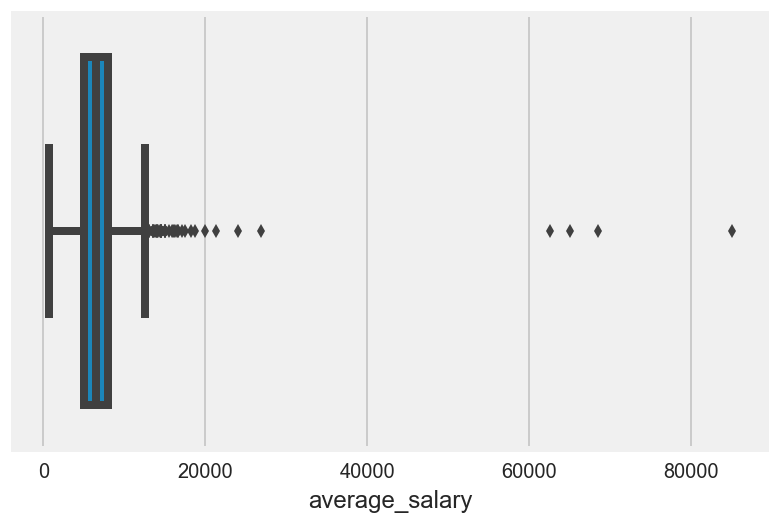

In [39]:
sns.boxplot(data_jobs['average_salary'])

In [40]:
target = data_jobs['average_salary']
threshold = 3*np.std(target)
shares_mean = np.mean(target)
outlier_count = np.sum(np.abs(target - shares_mean) >= threshold)
print('threshold is',threshold)
print(outlier_count, 'rows will be removed')

threshold is 15361.211431713844
6 rows will be removed


In [41]:
#salary, remove those outliers with super high salary
data_jobs=data_jobs[data_jobs['average_salary']<threshold]

In [42]:
data_jobs.shape

(928, 14)

In [43]:
data_jobs.describe()

,min_salary,max_salary,average_salary
count,928.000000,928.000000,928.000000
mean,5226.961207,8166.882543,6696.921875
std,2067.350729,3308.317236,2600.988043
min,500.000000,800.000000,650.000000
25%,4000.000000,6000.000000,5000.000000
50%,5000.000000,8000.000000,6500.000000
75%,6000.000000,10000.000000,8000.000000
max,13000.000000,20000.000000,15000.000000


C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


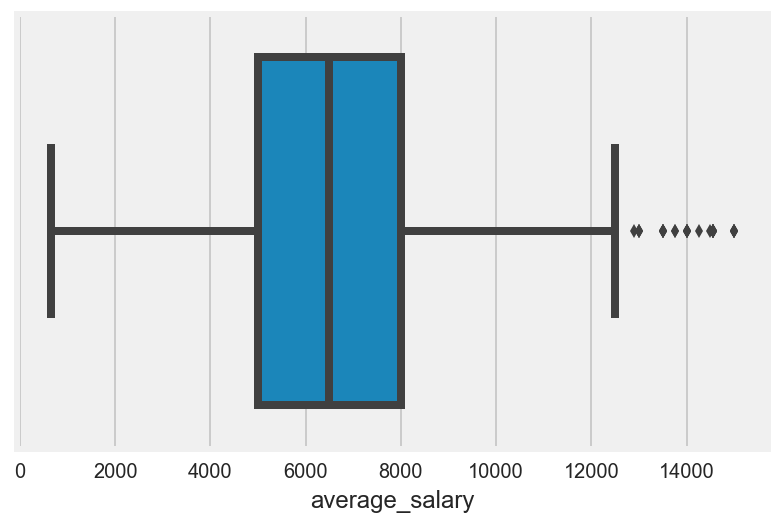

In [44]:
sns.boxplot(data_jobs['average_salary'])

In [45]:
data_jobs.columns

Index(['company', 'job_title', 'address', 'employment_type', 'seniority',
       'category', 'salary', 'salary_period', 'requirements', 'postal_code',
       'postal_district', 'min_salary', 'max_salary', 'average_salary'],
      dtype='object')

In [46]:
data_jobs['seniority'].unique()

array(['executive', 'middle management', 'junior executive',
       'professional', 'fresh/entry level', 'non-executive',
       'middle management, executive', 'manager', 'senior executive',
       'fresh/entry level, junior executive', 'senior management',
       'professional, senior executive', 'executive, non-executive',
       'manager, professional, senior executive', 'manager, professional',
       'fresh/entry level, professional', 'middle management, manager',
       'manager, senior executive', 'executive, junior executive',
       'middle management, professional', 'executive, senior executive',
       'professional, non-executive', 'fresh/entry level, executive',
       'non-executive, junior executive',
       'manager, professional, executive, senior executive',
       'professional, executive, junior executive, senior executive',
       'professional, executive',
       'professional, executive, senior executive',
       'senior management, manager',
       'fresh/entry

In [47]:
# data_jobs['seniority'].str.get_dummies(sep=',')

In [48]:
#seniority column, remove those words after ','
data_jobs['seniority'] = data_jobs['seniority'].str.split(',').str[0]

In [49]:
data_jobs['seniority'].unique()

array(['executive', 'middle management', 'junior executive',
       'professional', 'fresh/entry level', 'non-executive', 'manager',
       'senior executive', 'senior management', nan], dtype=object)

C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


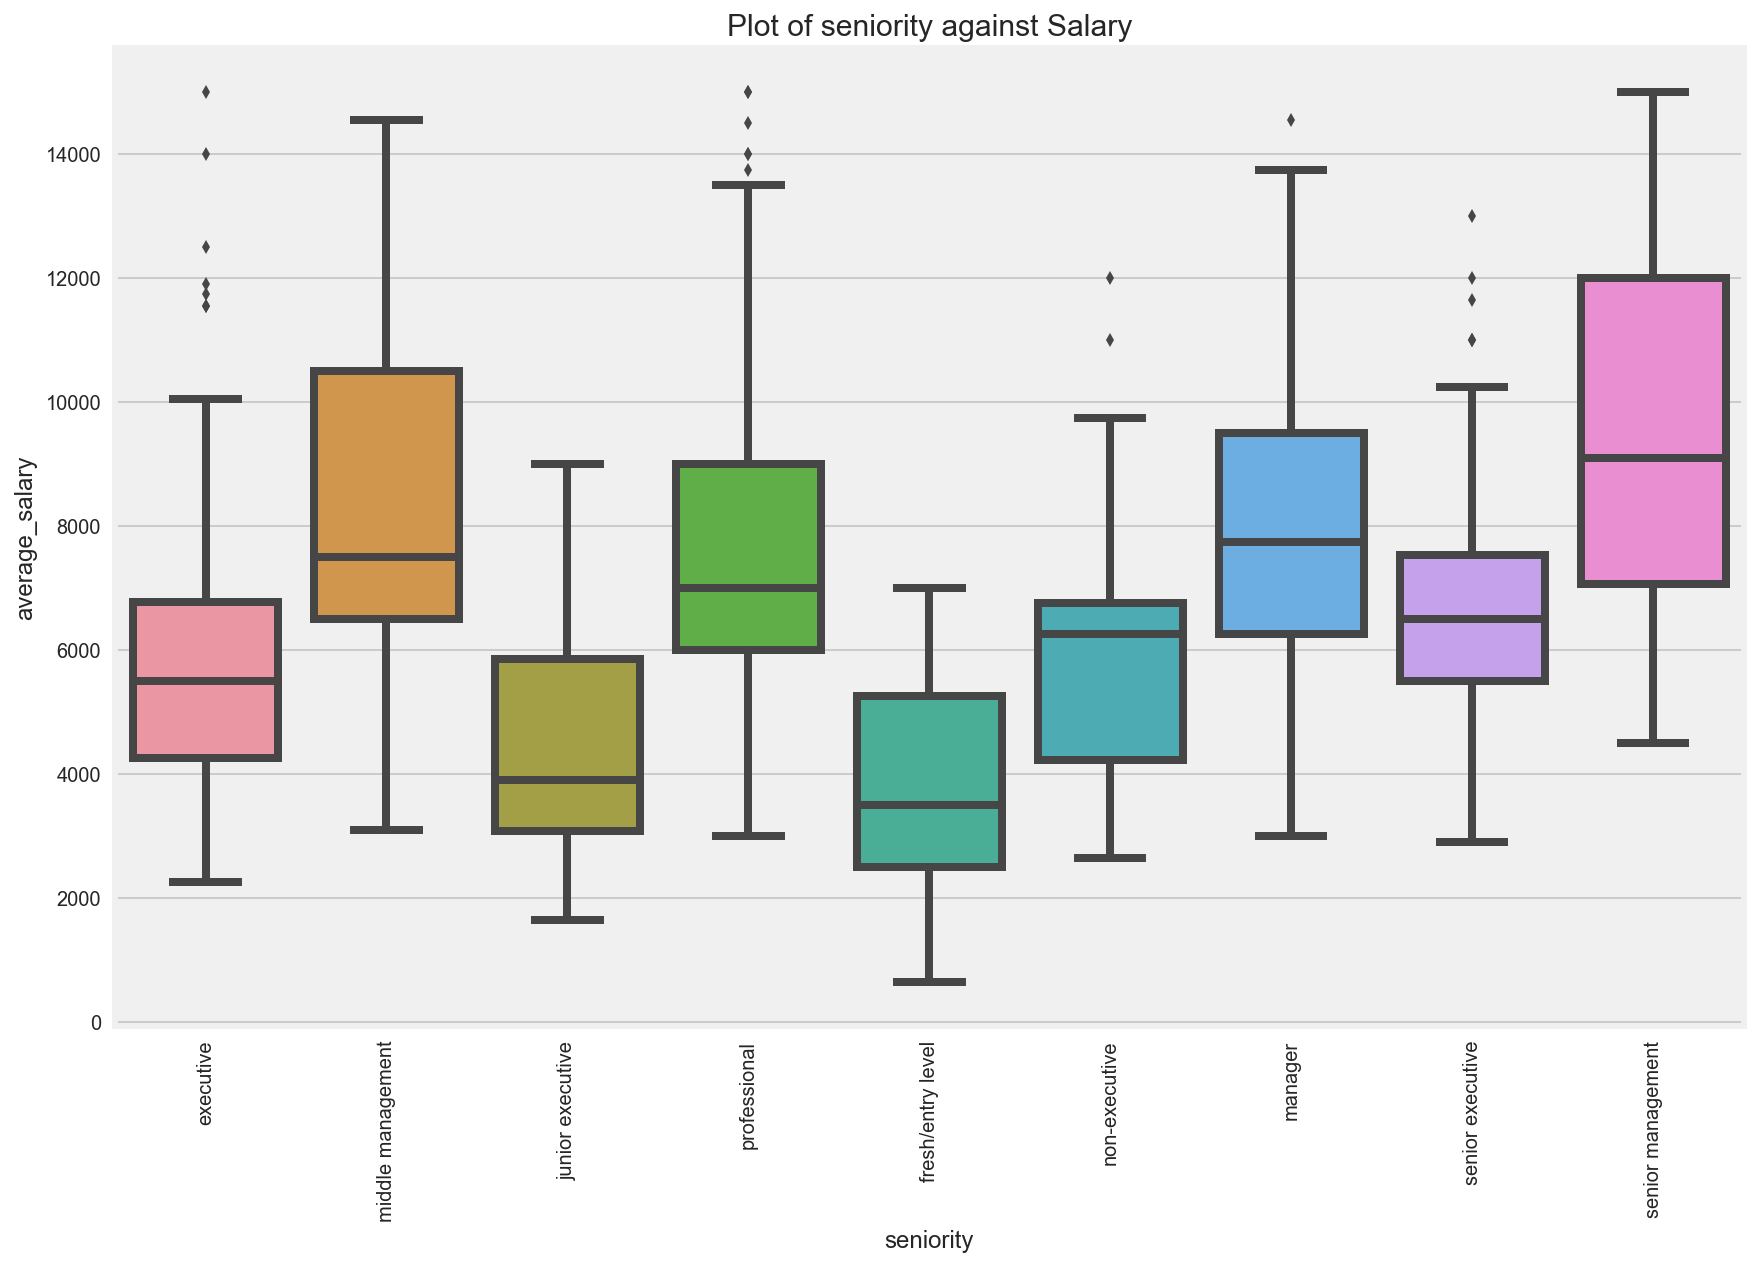

In [50]:
plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of seniority against Salary', fontsize = 15)
sns.boxplot(data_jobs['seniority'], data_jobs['average_salary'])

In [51]:
data_jobs['employment_type'].unique()

array(['Full Time', 'Permanent', 'Internship', 'Contract, Full Time',
       'Contract', 'Permanent, Contract', 'Temporary',
       'Permanent, Full Time', 'Permanent, Contract, Full Time',
       'Freelance, Full Time, Flexi work',
       'Temporary, Contract, Full Time',
       'Permanent, Temporary, Full Time',
       'Permanent, Full Time, Internship',
       'Contract, Full Time, Internship',
       'Part Time, Contract, Full Time, Internship',
       'Temporary, Contract',
       'Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship'],
      dtype=object)

In [52]:
#employment_type column, remove those words after ','
data_jobs['employment_type'] = data_jobs['employment_type'].str.split(',').str[0]

In [53]:
data_jobs['employment_type'].unique()

array(['Full Time', 'Permanent', 'Internship', 'Contract', 'Temporary',
       'Freelance', 'Part Time'], dtype=object)

C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


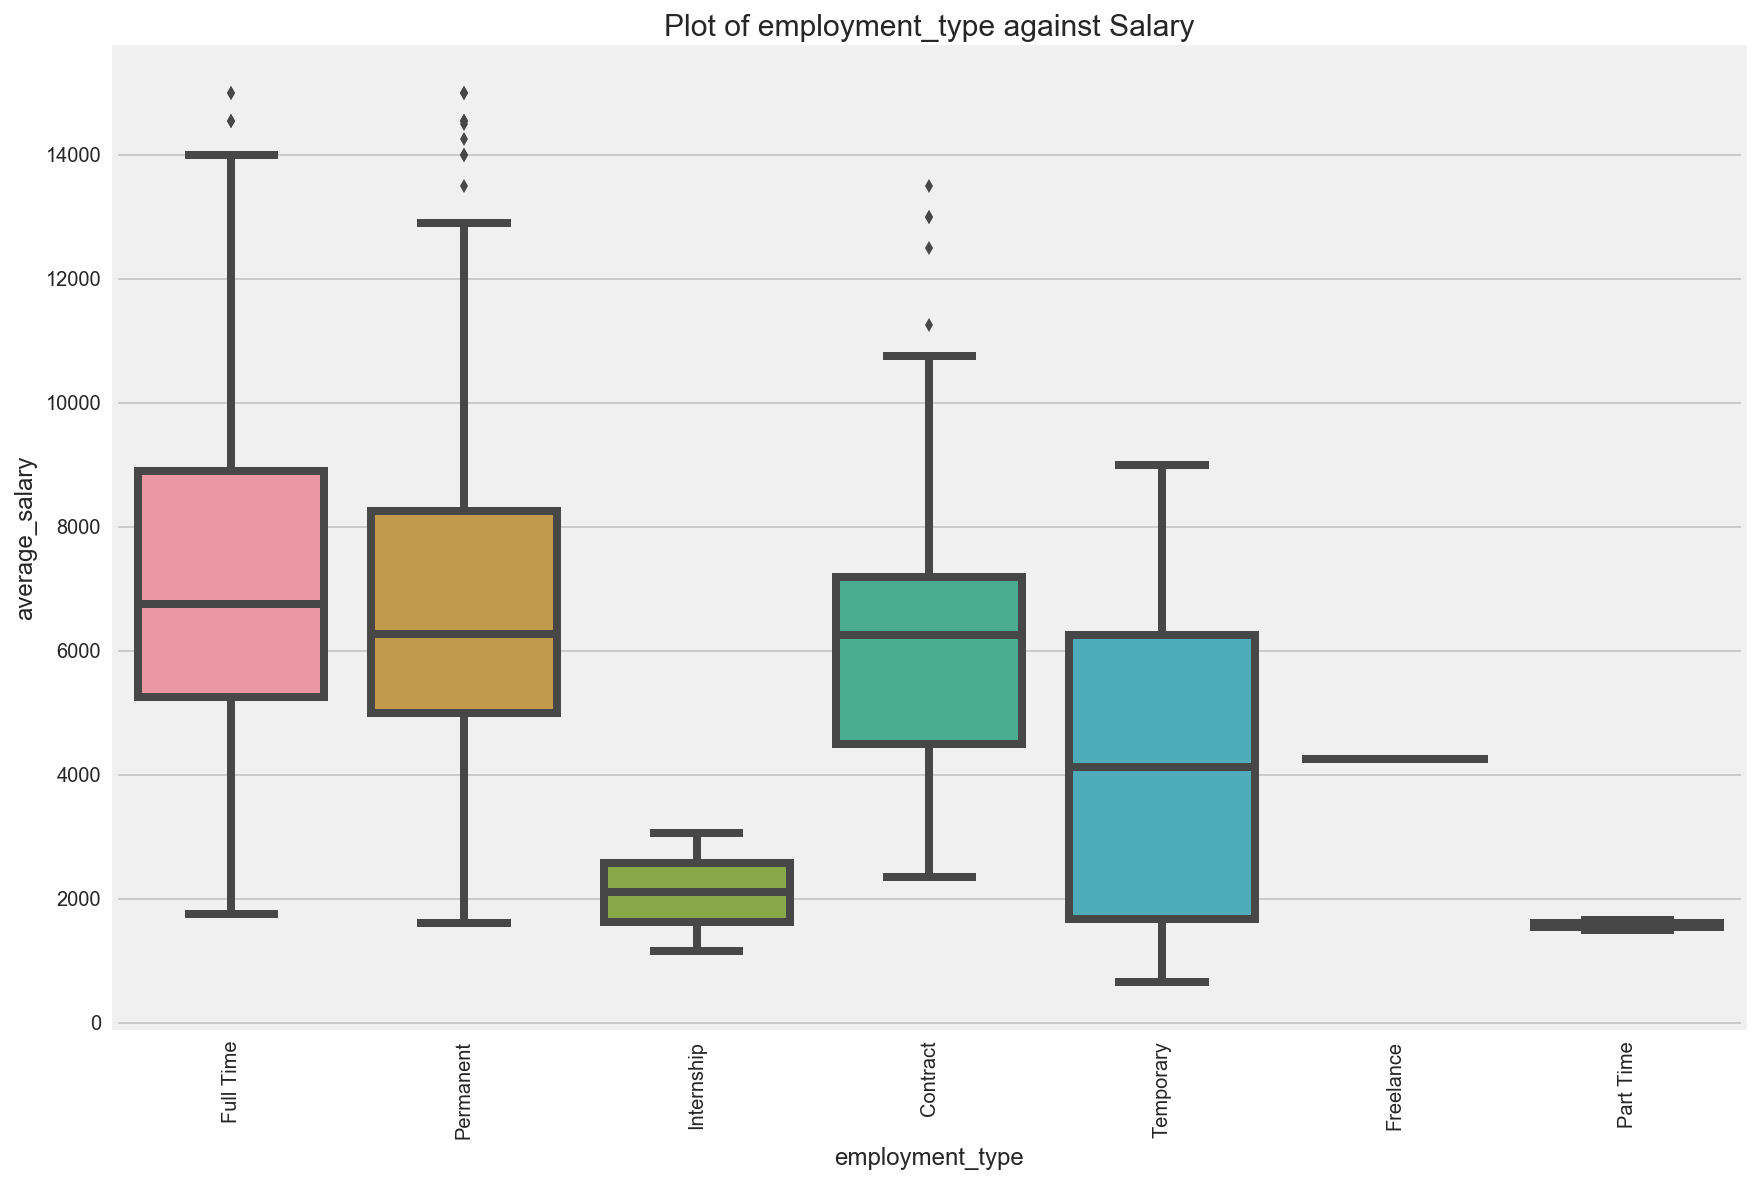

In [54]:
plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of employment_type against Salary', fontsize = 15)
sns.boxplot(data_jobs['employment_type'], data_jobs['average_salary'])

In [55]:
data_jobs['category'].unique()

array(['Information Technology', 'Engineering', 'Design',
       'Design, Engineering', 'Engineering, Information Technology',
       'Information Technology, Manufacturing, Others', 'Sales / Retail ',
       'Information Technology, Sciences / Laboratory / R&D',
       'Engineering, Information Technology, Sciences / Laboratory / R&D',
       'Banking and Finance', 'Education and Training',
       'Sciences / Laboratory / R&D',
       'Banking and Finance, Information Technology, Sciences / Laboratory / R&D',
       'Admin / Secretarial', 'Others', 'Consulting ',
       'Marketing / Public Relations ',
       'Education and Training, Sciences / Laboratory / R&D',
       'Banking and Finance, Information Technology, Insurance',
       'Building and Construction', 'Legal',
       'Consulting , Information Technology',
       'Information Technology, Insurance', 'Advertising / Media ',
       'Consulting , Banking and Finance, Information Technology',
       'Education and Training, Info

In [56]:
#category column, remove those words after ','
data_jobs['category'] = data_jobs['category'].str.split(',').str[0]

C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


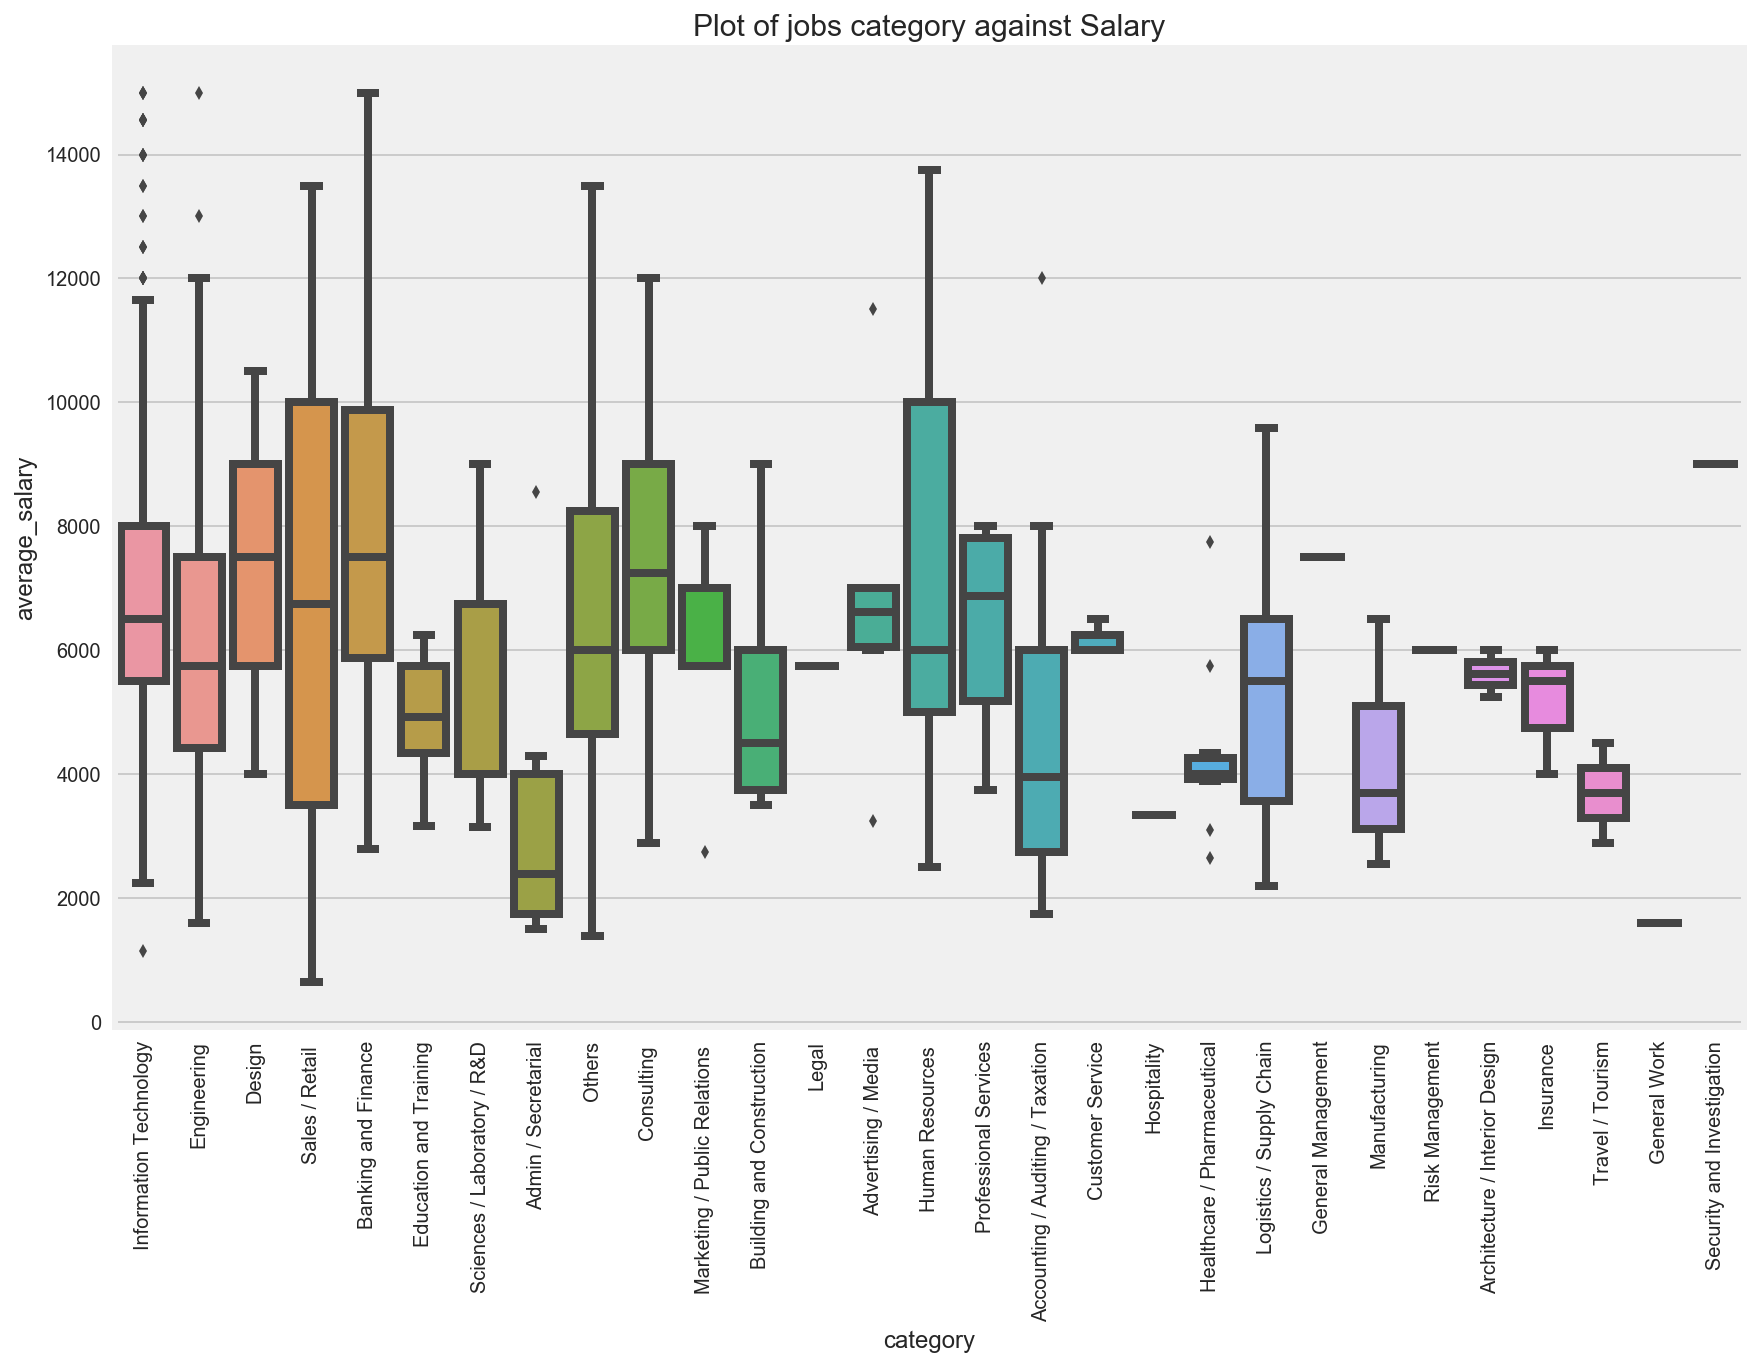

In [57]:
plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of jobs category against Salary', fontsize = 15)
sns.boxplot(data_jobs['category'], data_jobs['average_salary'])

C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


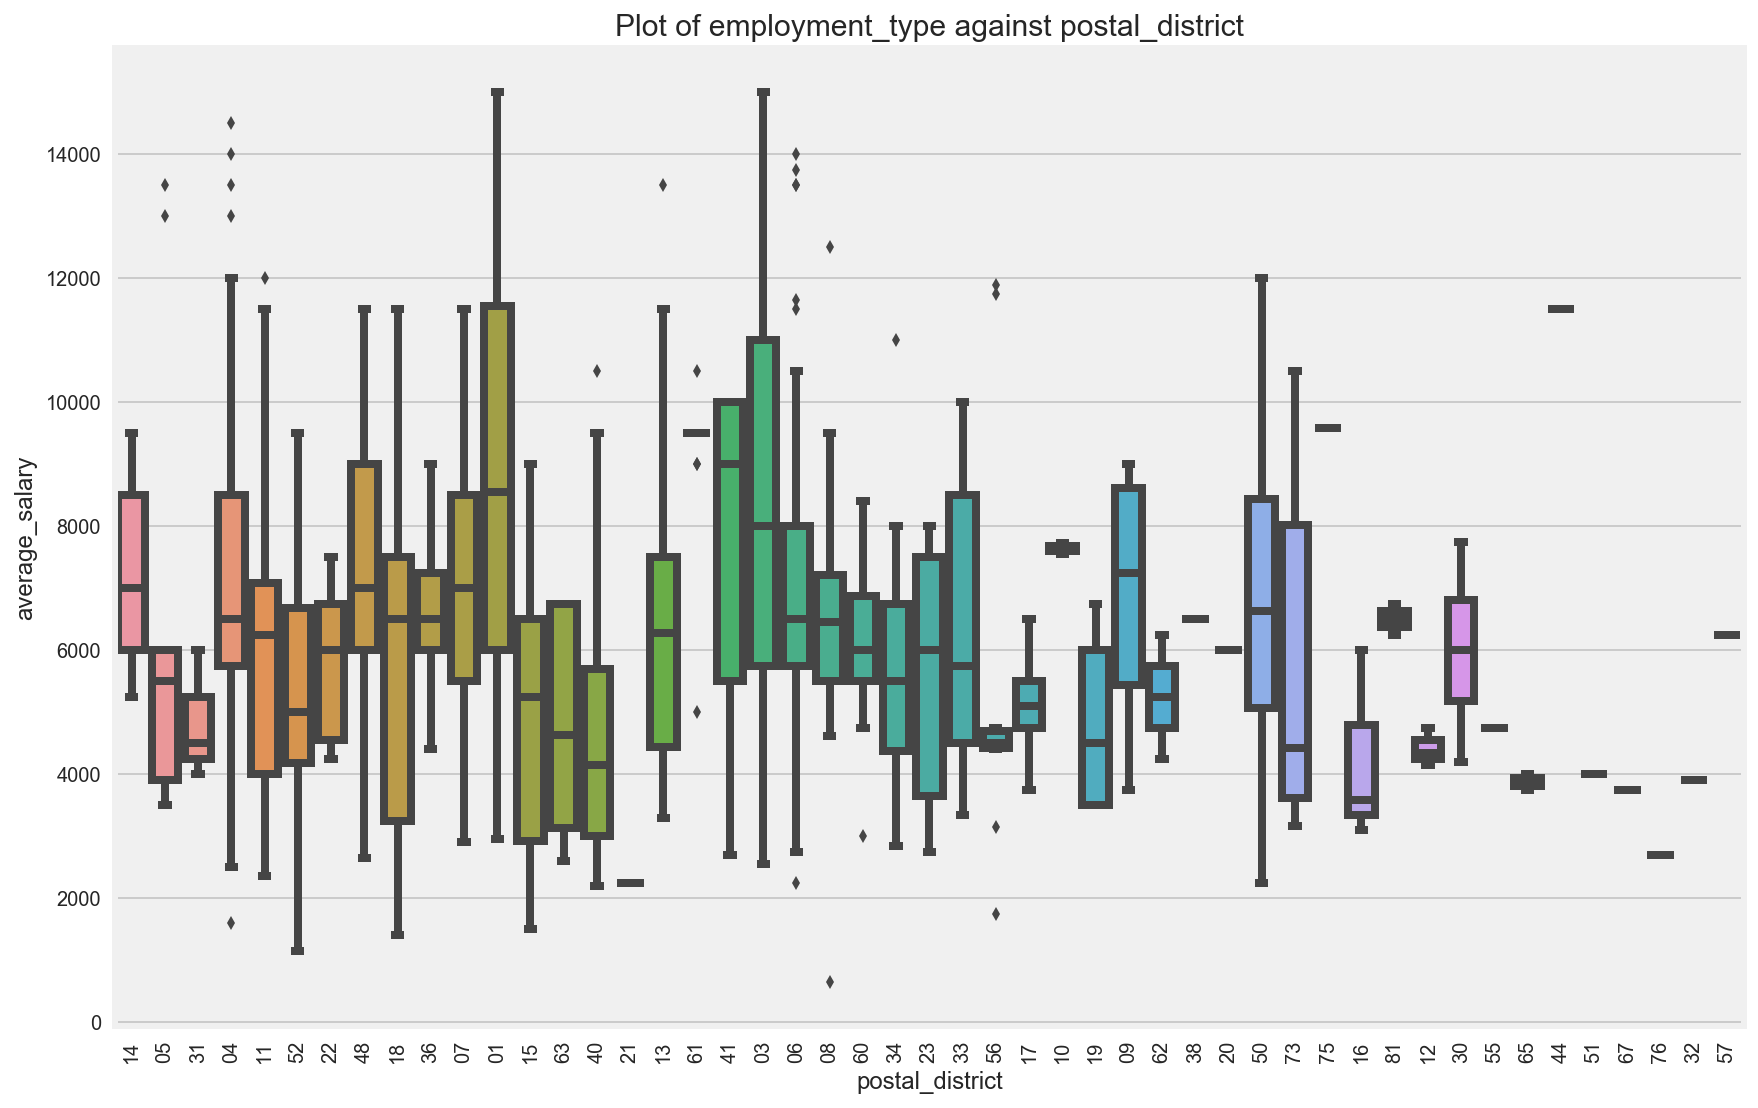

In [58]:
plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of employment_type against postal_district', fontsize = 15)
sns.boxplot(data_jobs['postal_district'], data_jobs['average_salary'])

In [59]:
data_jobs.columns

Index(['company', 'job_title', 'address', 'employment_type', 'seniority',
       'category', 'salary', 'salary_period', 'requirements', 'postal_code',
       'postal_district', 'min_salary', 'max_salary', 'average_salary'],
      dtype='object')

In [60]:
# define X & y
salary_X = data_jobs[['seniority', 'employment_type' ,'category','postal_district']]
salary_Y = data_jobs['average_salary']

In [61]:
salary_X_dummy = pd.get_dummies(salary_X , drop_first=True) 
print(salary_X_dummy.shape)

(928, 90)


In [62]:
salary_X_dummy.head()

,seniority_fresh/entry level,seniority_junior executive,seniority_manager,seniority_middle management,seniority_non-executive,seniority_professional,seniority_senior executive,seniority_senior management,employment_type_Freelance,employment_type_Full Time,...,postal_district_60,postal_district_61,postal_district_62,postal_district_63,postal_district_65,postal_district_67,postal_district_73,postal_district_75,postal_district_76,postal_district_81
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold

In [64]:
#we frame this as a regression problem first to predict the average_salary
#spilt to train test split
X_train, X_test, y_train, y_test = train_test_split(salary_X_dummy, salary_Y, test_size=0.3, random_state=42)

In [65]:
####ridge regression
ridge_alphas = np.logspace(-2, 7, 50)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=12)
optimal_ridge.fit(X_train, y_train)
print("best alpha parameter:", optimal_ridge.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)


ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
test_score=ridge.score(X_test, y_test)
residuals = abs(y_test-y_pred)

print("Cross-validated scores:", ridge_scores)
print("Mean Cross-validated train scores:", np.mean(ridge_scores))
print("Std Cross-validated train scores:", np.std(ridge_scores))
print("Mean Cross-validated test scores:", np.mean(test_score))
print("Mean residuals:", residuals.mean())


best alpha parameter: 3.7275937203149416
Cross-validated scores: [0.20411769 0.29857992 0.13699603 0.2269939  0.41954335 0.23142942
 0.18063569 0.29911686 0.31669578 0.40329984]
Mean Cross-validated train scores: 0.27174084757427863
Std Cross-validated train scores: 0.08792075030009094
Mean Cross-validated test scores: 0.25632483643072923
Mean residuals: 1678.6471809251793


C:\Users\ALICIA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
#check the coefficients for variables in the ridge
ridge.fit(X_train, y_train)
ridge_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print(ridge_coefs.head(10))


                        variable         coef     abs_coef
7    seniority_senior management  3394.458027  3394.458027
3    seniority_middle management  2007.106013  2007.106013
2              seniority_manager  1859.428019  1859.428019
81            postal_district_61  1786.278288  1786.278288
38      category_Sales / Retail   1721.609750  1721.609750
17  category_Banking and Finance  1615.304863  1615.304863
5         seniority_professional  1415.799541  1415.799541
28     category_Human Resources   1409.258627  1409.258627
0    seniority_fresh/entry level -1354.086430  1354.086430
68            postal_district_36 -1264.612329  1264.612329


In [67]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print("best alpha parameter:", optimal_lasso.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
test_score = lasso.score(X_test, y_test)
residuals = abs(y_test-y_pred)
print("Cross-validated scores:", lasso_scores)
print("Mean Cross-validated train scores:", np.mean(lasso_scores))
print("Std Cross-validated train scores:", np.std(lasso_scores))
print("Mean Cross-validated test scores:", np.mean(test_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

best alpha parameter: 5.17427359096368
Cross-validated scores: [0.19028684 0.3009796  0.06862696 0.1858286  0.42218394 0.21431705
 0.13986309 0.29928041 0.2865842  0.40559269]
Mean Cross-validated train scores: 0.25135433876884
Std Cross-validated train scores: 0.10685839162844649
Mean Cross-validated test scores: 0.24027444760834082


...........................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [68]:
#check the coefficients for variables in the lasso
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print(lasso_coefs.head(20))
print('Percent variables zeroed out:', (np.sum((lasso.coef_ == 0))/float(len(lasso.coef_)))*100,"%")


                        variable         coef     abs_coef
7    seniority_senior management  3977.492202  3977.492202
38      category_Sales / Retail   2532.402391  2532.402391
81            postal_district_61  2313.505335  2313.505335
3    seniority_middle management  2311.874352  2311.874352
2              seniority_manager  2050.634714  2050.634714
74            postal_district_50  2026.721915  2026.721915
28     category_Human Resources   1949.981592  1949.981592
17  category_Banking and Finance  1862.136083  1862.136083
68            postal_district_36 -1609.549308  1609.549308
55            postal_district_16 -1607.390653  1607.390653
5         seniority_professional  1509.462505  1509.462505
84            postal_district_65 -1357.259110  1357.259110
0    seniority_fresh/entry level -1357.067096  1357.067096
54            postal_district_15 -1280.796608  1280.796608
80            postal_district_60 -1244.789901  1244.789901
1     seniority_junior executive -1172.667567  1172.6675

Regression Model <br>
I build a regression modle based on these 4 variable: 'seniority', 'employment_type' ,'category','postal_district' to predict the average salary. <br>
The regression model did not have a high accuracy rate but we can still deduce from the model that jobs with a higher seniority level like Senior Management, middle management and manager will have a higher salary. Those working in 61 postal district and in the sales and retail industry will have a higher salary too. 

In [69]:
#if want to make it as a classifier question
#we shall spilt salary into high(1) vs. low salary(0), spilt by median salary

In [70]:
data_jobs.head()

,company,job_title,address,employment_type,seniority,category,salary,salary_period,requirements,postal_code,postal_district,min_salary,max_salary,average_salary
0,MONEYSMART SINGAPORE PTE. LTD.,data engineer,"GRANDE BUILDING, 8 COMMONWEALTH LANE 149555",Full Time,executive,Information Technology,"$5,000to$7,000",Monthly,RequirementsCompetencies Degree in Computer S...,149555,14,5000.0,7000.0,6000.0
1,PORTCAST PTE. LTD.,data scientist,32 CARPENTER STREET 059911,Full Time,middle management,Engineering,"$2,200to$6,000",Monthly,Requirements● Comfortable working with large ...,059911,05,2200.0,6000.0,4100.0
2,SINGAPORE PRESS HOLDINGS LIMITED,data visualisation designer,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",Permanent,junior executive,Design,"$3,500to$4,500",Monthly,Requirements Prior experience in a data visual...,318994,31,3500.0,4500.0,4000.0
4,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,data center engineering project engineer apac,"AIA TOWER, 1 ROBINSON ROAD 048542",Full Time,professional,Design,"$9,000to$12,000",Monthly,RequirementsBasic Qualifications - Minimum 5 ...,048542,04,9000.0,12000.0,10500.0
5,JOHNSON & JOHNSON PTE. LTD.,lead data center engineer,"ASCENT, 2 SCIENCE PARK DRIVE 118222",Permanent,professional,Engineering,"$5,000to$10,000",Monthly,RequirementsRequired Minimum Education: Bache...,118222,11,5000.0,10000.0,7500.0


In [71]:
median_salary = data_jobs['average_salary'].median()

In [72]:
data_jobs['salary_class']=data_jobs['average_salary'].apply(lambda x: '1' if x>median_salary else '0')

In [73]:
data_jobs['salary_class'].value_counts()

0    503
1    425
Name: salary_class, dtype: int64

In [74]:
# define X & y
salary_X = data_jobs[['seniority', 'employment_type' ,'category','postal_district']]
salary_Y = data_jobs['salary_class']

In [75]:
salary_X_dummy = pd.get_dummies(salary_X , drop_first=True) 
print(salary_X_dummy.shape)

(928, 90)


In [76]:
#we frame this as a regression problem first to predict the average_salary
#spilt to train test split
X_train, X_test, y_train, y_test = train_test_split(salary_X_dummy, salary_Y, test_size=0.3, random_state=42)

In [77]:
lr_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=10, max_iter= 20000)
lr_lasso.fit(X_train, y_train)
print(lr_lasso.C_)
yhat_lasso = lr_lasso.predict(X_test)
yhat_lasso_pp = lr_lasso.predict_proba(X_test)

coefs_vars = pd.DataFrame({
        'coef':lr_lasso.coef_[0],
        'variable':salary_X_dummy.columns,
        'abscoef':np.abs(lr_lasso.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars[coefs_vars['abscoef'] > 0]

[1.32194115]


,coef,variable,abscoef
81,2.315982,postal_district_61,2.315982
7,2.197366,seniority_senior management,2.197366
56,-2.006240,postal_district_17,2.006240
2,1.815892,seniority_manager,1.815892
54,-1.392716,postal_district_15,1.392716
0,-1.372846,seniority_fresh/entry level,1.372846
68,-1.230779,postal_district_36,1.230779
74,1.196886,postal_district_50,1.196886
1,-1.179864,seniority_junior executive,1.179864
39,1.151211,category_Sciences / Laboratory / R&D,1.151211


In [78]:
lasso_scores = cross_val_score(lr_lasso, X_train, y_train, cv=5)

print("Cross-validated scores:", lasso_scores)
print("Mean Cross-validated train scores:", np.mean(lasso_scores))
print("Std Cross-validated train scores:", np.std(lasso_scores))
#print("Mean Cross-validated test scores:", np.mean(test_score))

Cross-validated scores: [0.65648855 0.69230769 0.66923077 0.65891473 0.68992248]
Mean Cross-validated train scores: 0.6733728440918215
Std Cross-validated train scores: 0.015124101503224976


In [79]:
# Run RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score

rfc = RandomForestClassifier(random_state=620)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

C:\Users\ALICIA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
# Confusion matrix of rfc method
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score  
rfc_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, rfc_predict)),
                         index = ['is_high_salary', 'is_low_salary'],
                        columns=['predicted_high_salary','predicted_low_salary'])
rfc_confusion

,predicted_high_salary,predicted_low_salary
is_high_salary,107,63
is_low_salary,33,76


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       170
           1       0.55      0.70      0.61       109

   micro avg       0.66      0.66      0.66       279
   macro avg       0.66      0.66      0.65       279
weighted avg       0.68      0.66      0.66       279



In [82]:
print(accuracy_score(y_test, rfc_predict))

0.6559139784946236


Classification Model <br>
I build a classification model based on these 4 variable: 'seniority', 'employment_type' ,'category','postal_district' to predict the salary class. <br>

In [ ]:
#Try the NLP method if got time...
#predict salary class based on requirements text. 

In [ ]:
#2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
#- Section 1: Job Salary Trends
#- Section 2: Job Category Factors

#3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
#   - Make sure to clearly describe and label each section.
#   - Comment on your code so that others could, in theory, replicate your work.

# 4. A brief writeup in an executive summary, written for a non-technical audience.
#    - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.


### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.



In [83]:
#question 2
#junior vs. senior positions
data_jobs['seniority'].unique()

array(['executive', 'middle management', 'junior executive',
       'professional', 'fresh/entry level', 'non-executive', 'manager',
       'senior executive', 'senior management', nan], dtype=object)

In [111]:
data_jobs['seniority'].value_counts()

professional         257
executive            217
senior executive     116
manager               95
non-executive         70
junior executive      55
middle management     38
senior management     34
fresh/entry level     33
Name: seniority, dtype: int64

In [112]:
#senior positions: professional, manager, middle management, senior management
#junior positions: executive, senior executive, non executive, junior executive, fresh/entry level

In [115]:
data_jobs['seniority_class'] = data_jobs['seniority'].apply(lambda x: 'senior' if x in(['professional', 'manager', 'middle management', 'senior management']) else 'junior')

In [116]:
data_jobs['seniority_class'].value_counts()

junior    491
senior    424
Name: seniority_class, dtype: int64

In [117]:
#requirements, remove rows without requirements as it is the variable used to 
data_jobs.dropna(subset=['requirements'], inplace=True)

In [118]:
data_jobs.shape

(915, 16)

In [119]:
# define X & y
position_X = data_jobs['requirements']
position_y = data_jobs['seniority_class']

In [120]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(position_X, position_y, test_size=0.3, random_state=42)

In [154]:
# check out the stop words list
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
stop = stopwords.words('english')

# append new stop words
add_stop = ['requirements','qualification', 'qualifications', 'least', 'year', 'years', 'experiences','experience', 'end', 'relevant qualification', 'qualification least', 'least years','candidate','must']
for word in add_stop:
    stop.append(word)
print (stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [155]:
cvec = CountVectorizer(stop_words=stop, ngram_range=(1,3))
# Fit our vectorizer using our train data
X = cvec.fit(X_train)

C:\Users\ALICIA\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['relevant'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [156]:
cvec.vocabulary_ 

{'recognized': 55666,
 'diploma': 20328,
 'degree': 17668,
 'computer': 12989,
 'science': 60009,
 'information': 33261,
 'technology': 69895,
 'relevant': 56623,
 'work': 76073,
 'support': 67403,
 'environment': 23481,
 'preferably': 50787,
 'user': 73578,
 'strong': 66482,
 'knowledge': 36337,
 'os': 47295,
 '400': 410,
 'policy': 50082,
 'hands': 30238,
 'bcp': 7610,
 'dr': 21215,
 'site': 62406,
 'advantage': 2425,
 'able': 1079,
 'independently': 32734,
 'team': 68679,
 'fast': 26464,
 'leaner': 37924,
 'great': 29760,
 'initiative': 33555,
 'positive': 50224,
 'learning': 38040,
 'attitude': 6279,
 'good': 29208,
 'interpersonal': 34575,
 'communication': 12204,
 'skills': 62590,
 'recognized diploma': 55669,
 'diploma degree': 20339,
 'degree computer': 17711,
 'computer science': 13044,
 'science information': 60121,
 'information technology': 33386,
 'technology relevant': 70042,
 'relevant relevant': 56756,
 'relevant work': 56796,
 'work support': 76470,
 'support environme

In [157]:
# number of features created
print ('# of features: {}'.format(len(cvec.get_feature_names())))

# of features: 77668


In [158]:
# Transforming our x_train data using our fit cvec.
# And converting the result to a DataFrame.
X_train_df = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())

In [159]:
X_train_df.shape

(640, 77668)

In [160]:
# Which words appear the most?
word_counts = X_train_df.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data             1248
skills            863
knowledge         681
strong            531
ability           501
work              425
business          413
good              412
management        400
working           371
degree            369
development       360
communication     311
understanding     309
science           305
team              304
computer          296
design            276
tools             274
engineering       273
dtype: int64

In [161]:
X_test_df = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())

In [162]:
print ('Shape training set X: {}'.format(X_train_df.shape))
print ('Shape training set y: {}'.format(y_train.shape))
print ('\b\b')
print ('Shape testing set X: {}'.format(X_test_df.shape))
print ('Shape testing set y: {}'.format(y_test.shape))

Shape training set X: (640, 77668)
Shape training set y: (640,)

Shape testing set X: (275, 77668)
Shape testing set y: (275,)


In [163]:
#Import and fit our logistic regression and test it too
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_df, y_train)
lr.score(X_test_df, y_test)

C:\Users\ALICIA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6872727272727273

In [165]:
coefs_vars = pd.DataFrame({
        'coef':lr.coef_[0],
        'variable':X_train_df.columns,
        'abscoef':np.abs(lr.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars[coefs_vars['abscoef'] > 0]

,coef,variable,abscoef
16874,-0.375858,database,0.375858
24947,0.372701,excellent,0.372701
3973,0.365142,analytics,0.365142
42563,-0.362622,microsoft,0.362622
53689,0.335935,projects,0.335935
36337,0.333212,knowledge,0.333212
20180,0.320967,different,0.320967
44084,-0.317734,ms,0.317734
56267,0.310113,related,0.310113
76073,-0.300914,work,0.300914


In [166]:
# Preprocess our text data to Tfidf
tfv = TfidfVectorizer(ngram_range=(1,3),stop_words=stop, max_features=3000)
X = tfv.fit_transform(X_train).todense()
X.shape

C:\Users\ALICIA\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['relevant'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(640, 3000)

In [167]:
# cross-validate the accuracy:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(LogisticRegression(solver='lbfgs'), X, y_train, cv=10)
import numpy as np
print(accuracies)
print(np.mean(accuracies))

[0.56923077 0.70769231 0.64615385 0.640625   0.65625    0.65625
 0.71875    0.66666667 0.66666667 0.65079365]
0.6579078907203908


I tried using NLP to classify the requirements text to junior or senior postition. Words like excellent, analytics, projest, knownledge and mnanage will most likely have descriptions of a senior position. 

### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

In [ ]:
#Run the regression model using the minimum salary instead. 

In [ ]:
# 5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

# 6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.